In [1]:
# coding=utf-8
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
from IPython.display import display, HTML

HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:0.5em;
margin-bottom:0.5em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.0em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: "Times New Roman", Times, serif;
font-size:1.3em;
line-height:1.5em;
padding-left:1em;
padding-right:1em;
}
</style>
""")

In [2]:
data_type = {"sexo": str,
             "ind_nuevo": str,
             "ult_fec_cli_1t": str,
             "indext": str}

In [3]:
# Read cleaned data file
df = pd.read_csv("train_final.csv", dtype=data_type)

/Users/amitrajan/Desktop/PythonVirtualEnvs/MLProject/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.set_option('display.max_columns', None)
df.head(20)

,Unnamed: 0,Unnamed: 0.1,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month,joined_month
0,0,3193878,515488,2015-01-28,816978,1,1,0,55,0,80,1.0,UNKWN,1,2,1,2,0,45,2,1,39.0,1,67804.53,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,11
1,1,11981689,461199,2015-01-28,154073,1,1,0,50,0,187,1.0,UNKWN,1,2,1,2,0,54,2,1,43.0,1,109185.81,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,12
2,2,3521925,483294,2015-01-28,739359,1,1,1,48,0,91,1.0,UNKWN,1,2,1,2,0,4,2,1,14.0,1,101850.00,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.0,0.0,0,1,12
3,3,8480398,563229,2015-01-28,482251,1,1,0,23,0,132,1.0,UNKWN,1,2,1,2,0,4,2,1,28.0,1,131938.74,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,7
4,4,3521923,107657,2015-01-28,922105,1,1,1,24,0,48,1.0,UNKWN,1,2,1,2,0,1,2,1,14.0,1,41739.18,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,7
5,5,8480396,563228,2015-01-28,482246,1,1,1,36,0,132,1.0,UNKWN,1,2,1,2,0,4,2,1,28.0,1,155734.95,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1,1,7
6,6,8480394,563227,2015-01-28,482245,1,1,1,48,0,124,1.0,UNKWN,1,1,1,2,0,5,2,1,28.0,1,64455.33,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,7
7,7,8480393,563197,2015-01-28,482260,1,1,0,38,0,132,1.0,UNKWN,1,1,1,2,0,5,2,1,28.0,1,136272.24,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,8
8,8,520435,407227,2015-01-28,93503,1,1,0,51,0,207,1.0,UNKWN,1,2,1,2,0,5,2,1,4.0,1,79961.82,2,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1.0,1.0,1,1,4
9,9,4249387,35628,2015-01-28,1029923,1,1,0,23,0,36,1.0,UNKWN,1,1,1,1,0,1,2,1,17.0,1,103388.22,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,7


Monthly count of products is shown in the following plot.

In [5]:
# Add total number of product as a new column
df["total_products"] = df.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)

In [6]:
# Plot month-wise product count
df["total_products"] = pd.to_numeric(df["total_products"], errors="coerce")

aa = df.groupby('fecha_dato')['total_products'].sum()

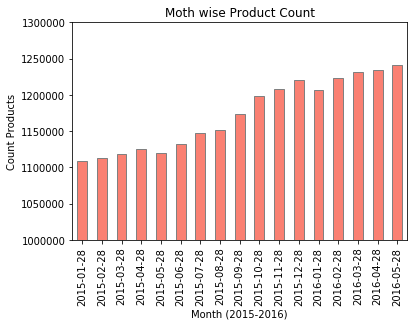

In [7]:
%matplotlib inline
plt.figure()
aa.plot(kind='bar', color='#FA8072', ec='grey')
axes = plt.gca()
plt.xlabel("Month (2015-2016)")
plt.ylabel("Count Products")
axes.set_ylim([1000000,1300000])
plt.title("Moth wise Product Count")
plt.savefig("Moth wise Product Count.png")
plt.show()
plt.close()

We are going to plot the individual product count of various products each month to find the nature of the variation of individual products over the course of entire period. The code and plot is as follows. It is evident from the plot that certain products are dominant but some of them are sold in very low numbers (as their count is low for the entire period). Apart from this, certain products have maintained almost constant count for the entire period but some depicts higher variation over the period.

From the month-wise product count it is evident that <b>ind_ahor_fin_ult1 (Saving Account)</b> and <b>ind_aval_fin_ult1 (Guarantees)</b> have low values for the entire period and hence we are going to discard them while doing the classification.

In [8]:
class_label_columns = ['ind_ahor_fin_ult1',         # Saving Account
                       'ind_aval_fin_ult1',         # Guarantees
                       'ind_cco_fin_ult1',          # Current Accounts
                       'ind_cder_fin_ult1',         # Derivada Account
                       'ind_cno_fin_ult1',          # Payroll Account
                       'ind_ctju_fin_ult1',         # Junior Account
                       'ind_ctma_fin_ult1',         # Más particular Account
                       'ind_ctop_fin_ult1',         # particular Account
                       'ind_ctpp_fin_ult1',         # particular Plus Account
                       'ind_deco_fin_ult1',         # Short-term deposits
                       'ind_deme_fin_ult1',         # Medium-term deposits
                       'ind_dela_fin_ult1',         # Long-term deposits
                       'ind_ecue_fin_ult1',         # e-account
                       'ind_fond_fin_ult1',         # Funds
                       'ind_hip_fin_ult1',          # Mortgage
                       'ind_plan_fin_ult1',         # Pensions
                       'ind_pres_fin_ult1',         # Loans
                       'ind_reca_fin_ult1',         # Taxes
                       'ind_tjcr_fin_ult1',         # Credit Card
                       'ind_valo_fin_ult1',         # Securities
                       'ind_viv_fin_ult1',          # Home Account
                       'ind_nomina_ult1',           # Payroll
                       'ind_nom_pens_ult1',         # Pensions
                       'ind_recibo_ult1'            # Direct Debit
                       ]

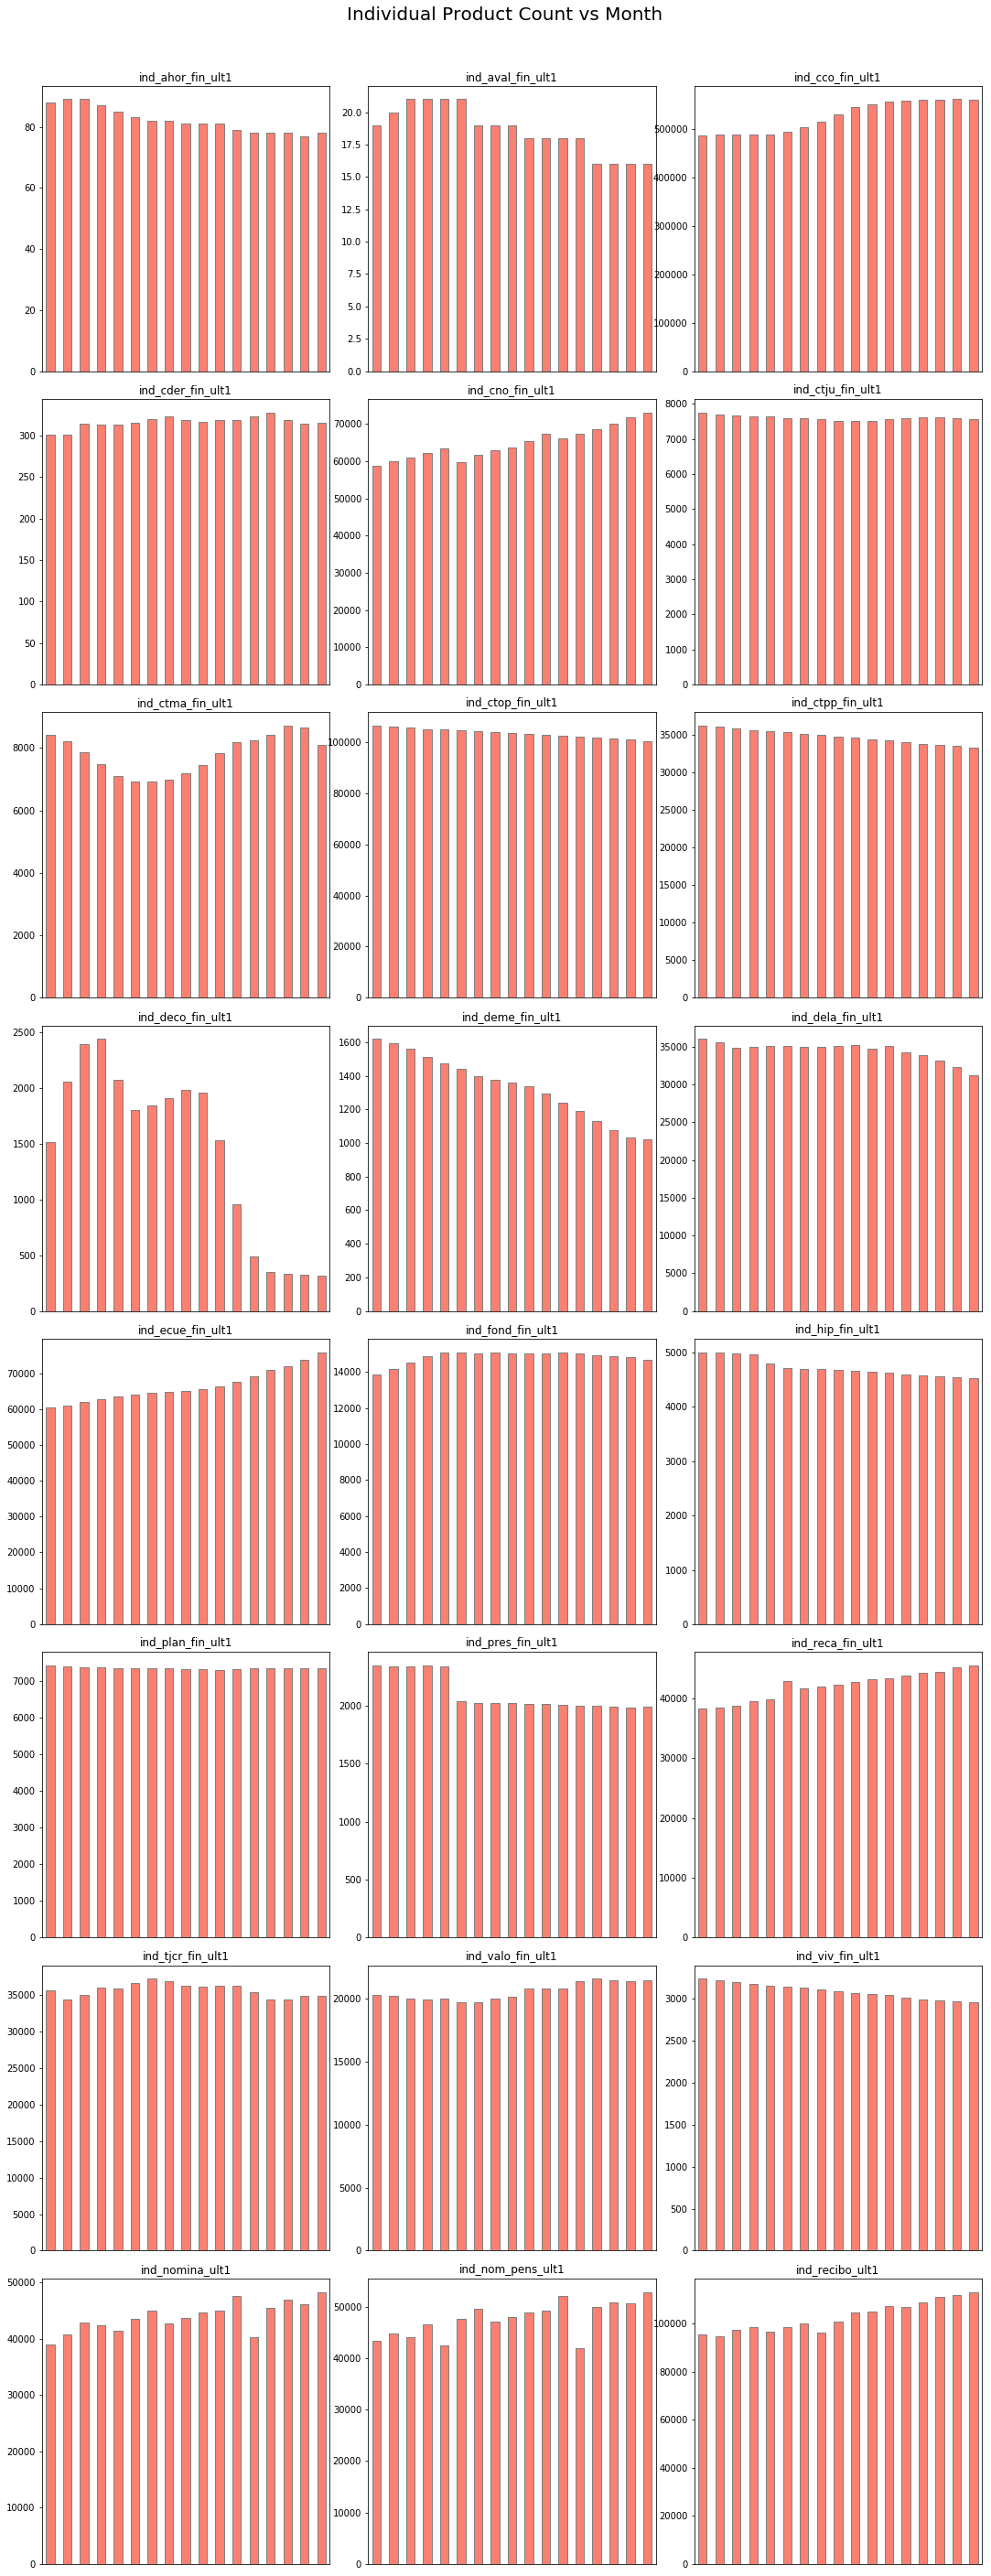

In [9]:
%matplotlib inline
fig, axs = plt.subplots(8, 3, figsize=(15, 40))
fig.suptitle("Individual Product Count vs Month", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
axs = axs.ravel()

i = 0
for products in class_label_columns:
    temp = df.groupby('fecha_dato')[products].apply(lambda x: x.astype(int).sum())
    temp.plot(kind='bar', color='#FA8072', ec='grey', ax=axs[i])
    axs[i].set_title(products)
    axs[i].set_xlabel(" ")
    axs[i].set_xticks([], minor=False)
    i += 1

plt.savefig("Individual Product Count vs Month.png")

Another interesting analysis can be done based on age. We can divide the customers into various age groups and find the customer count for every age group. We can also analyze the type of products a customer has, based on the age-group in which he/she belongs. It can be observed that almost 45% customers belongs to the age-group 18-35 followed by 38% from the group 35-55 but the later group has almost 50% of the products followed by the former group having 32%. For the detaled analysis of the count of products based on the age, we can plot the count versues the discrete values of age. The plot is <b>bimodal</b> which means that maximum distribution of products is centered around two age values (one is around 25 and the other around 50).

On the analysis of the distribution of individual products with respect to age-groups, it is observed that almost all the products are dominated by the age-group 35-55, except <b>ind_cco_fin_ult1 (Current Accounts)</b> and <b>ind_ctju_fin_ult1	(Junior Account)</b> which have 52% and 100% of their customers in age-group 18-35. Though the explanation for the higher percentage of the second product is obvious from the name, exceptional higher percentage of Current Accounts is somewhat interesting.

The top three products having higher ownership percentage for the age-group 55-75 are : <b>ind_dela_fin_ult1 (Long-term deposits)</b>, <b>ind_fond_fin_ult1 (Funds)</b> and <b>ind_plan_fin_ult1 (Pensions)</b>. The reason for higher percentage of these products in the mentioned age-group is self-explanatory.

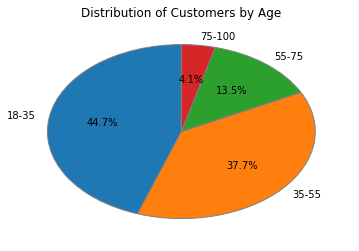

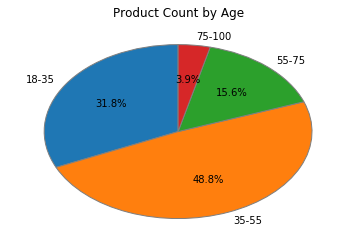

In [10]:
# Analysis based on age
df['age_group'] = pd.cut(df['age'], bins=[17, 35, 55, 75, 100])

temp_age_count = df[['ncodpers', 'age_group']].groupby('age_group').count()
temp_age_product_count = df.groupby('age_group')['total_products'].sum()

%matplotlib inline
plt.figure()
temp_age_count.plot(kind='pie', y='ncodpers', autopct='%1.1f%%',
                    labels=['18-35', '35-55', '55-75', '75-100'], wedgeprops={'ec': 'gray'},
                    startangle=90, fontsize=10, legend=False)
axes = plt.gca()
plt.ylabel(" ")
plt.title("Distribution of Customers by Age")
plt.savefig("Distribution by Age.png")
plt.show()
plt.close()

temp_age_product_count.plot(kind='pie', y='total_products', autopct='%1.1f%%',
                            labels=['18-35', '35-55', '55-75', '75-100'], wedgeprops={'ec': 'gray'},
                            startangle=90, fontsize=10, legend=False)
axes = plt.gca()
plt.ylabel(" ")
plt.title("Product Count by Age")
plt.savefig("Product Count by Age.png")
plt.show()
plt.close()

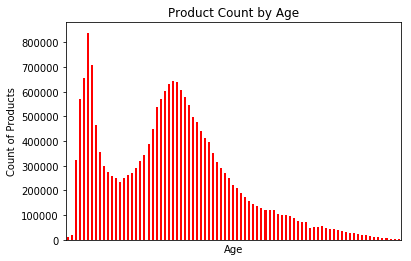

In [11]:
# Product count by age
%matplotlib inline
plt.figure()
df.groupby('age')['total_products'].sum().plot(kind='bar', color='red')
frame = plt.gca()
frame.axes.set_xticks([], minor=False)
plt.xlabel("Age")
plt.ylabel("Count of Products")
plt.title("Product Count by Age")
plt.savefig("Product Count by Age.png")
plt.show()
plt.close()

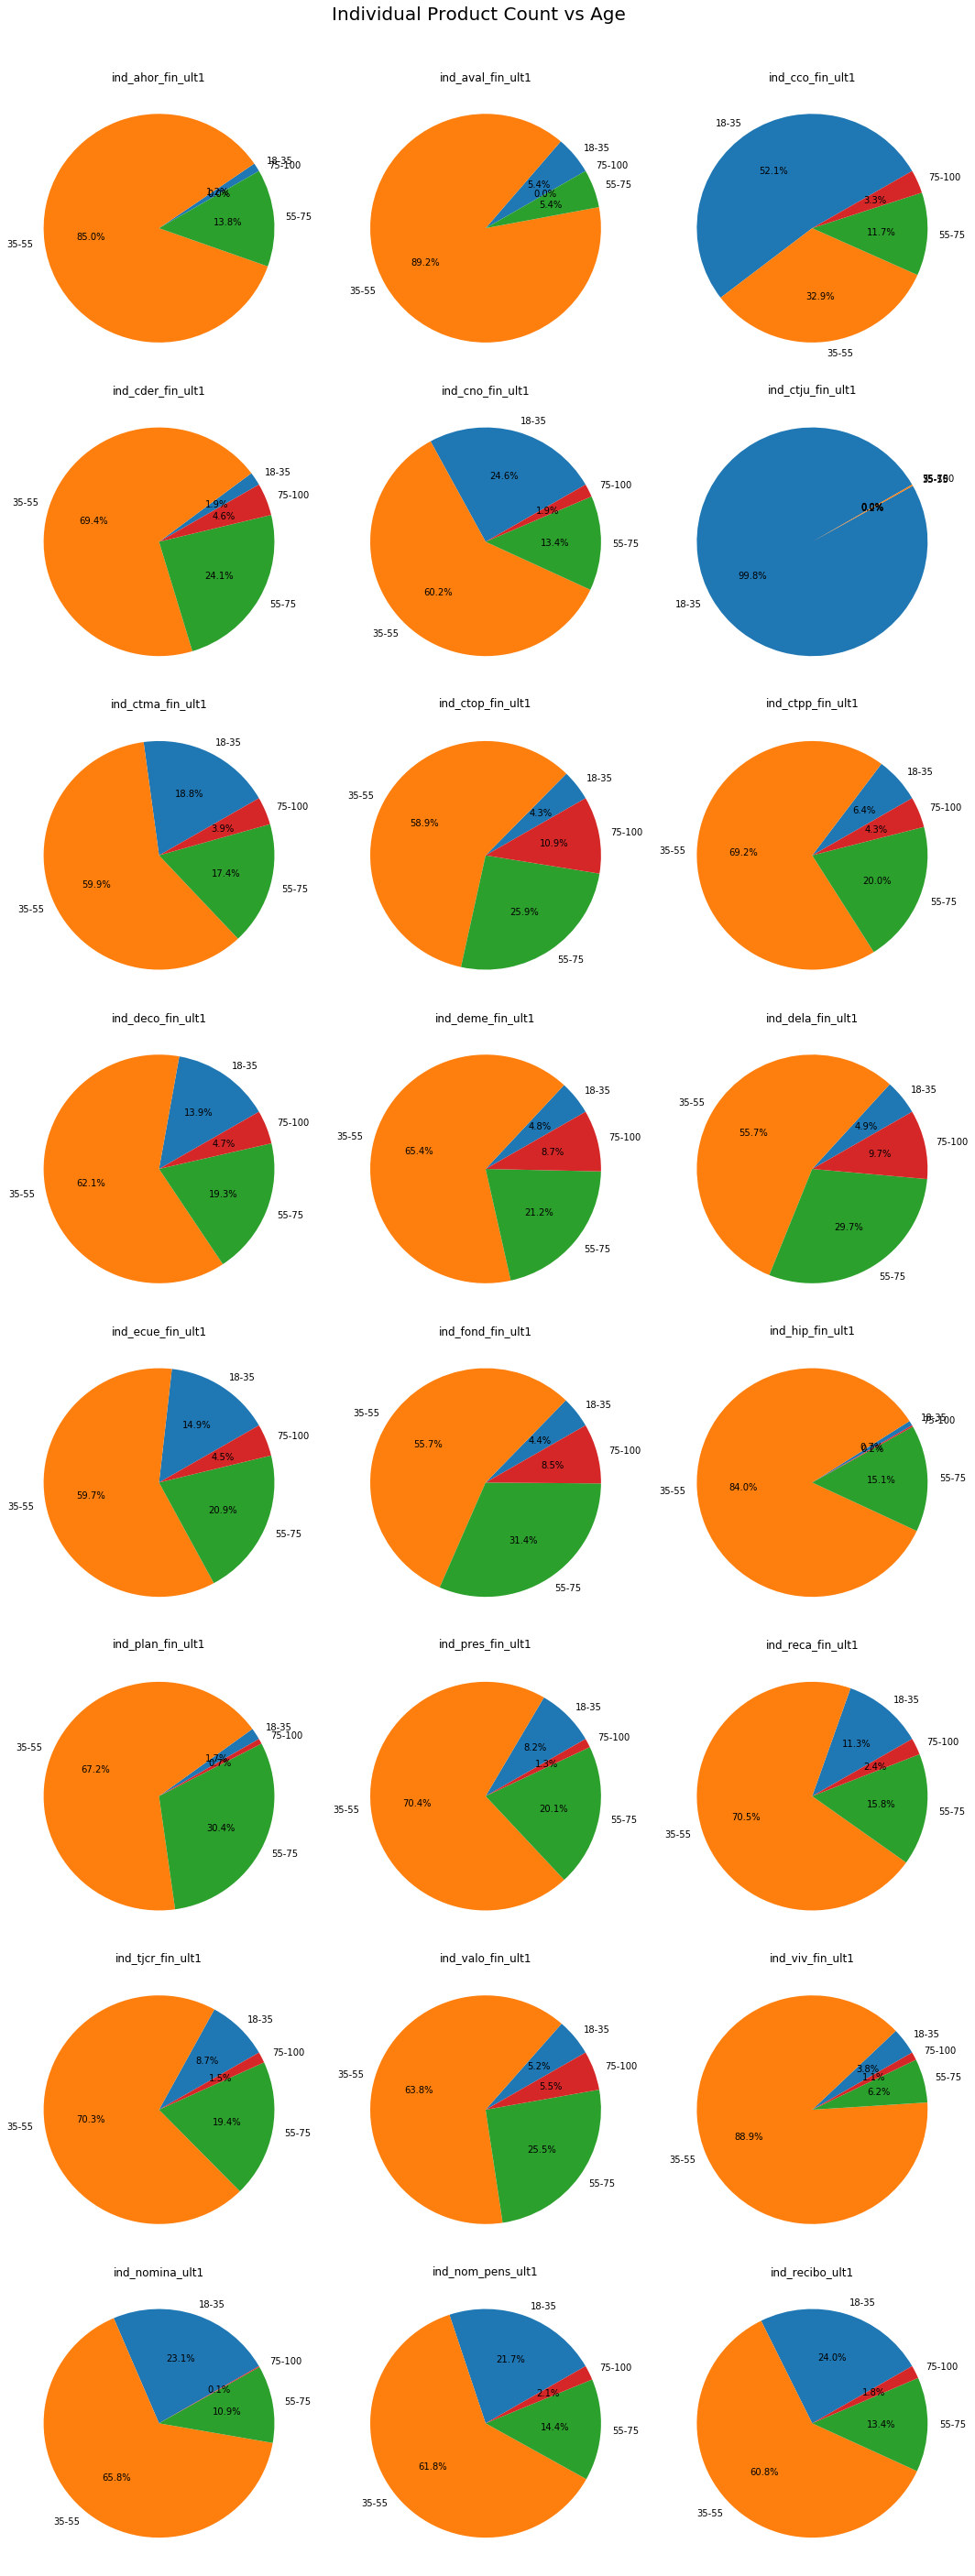

In [12]:
%matplotlib inline
fig, axs = plt.subplots(8, 3, figsize=(15, 40))
fig.suptitle("Individual Product Count vs Age", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
axs = axs.ravel()

i = 0
for products in class_label_columns:
    temp = df.groupby('age_group')[products].apply(lambda x: x.astype(int).sum())
    axs[i].pie(temp, labels=['18-35', '35-55', '55-75', '75-100'], startangle=30, autopct='%1.1f%%')
    axs[i].set_title(products)
    i += 1

plt.savefig("Individual Product Count vs Age.png")

We can get further insight by analyzing the product distribution based on Sex. The distributions of customer count and total product count based on sex are almost identical. If we look at the distribution of individual products based on sex, the product counts that are skewed with Males having the higher percentage are : <b>ind_cder_fin_ult1 (Derivada Account)</b>, <b>ind_pres_fin_ult1 (Loans)</b>, <b>ind_valo_fin_ult1	(Securities)</b> and <b>ind_hip_fin_ult1 (Mortgage)</b>.

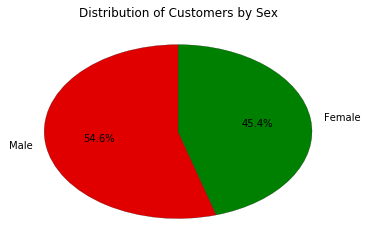

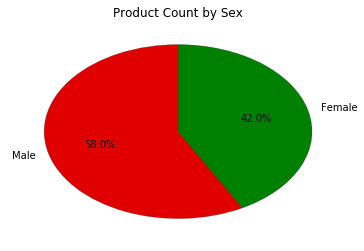

In [13]:
# Analysis based on sex
df[['ncodpers', 'sexo']].groupby('sexo').count().plot(kind='pie', y='ncodpers', autopct='%1.1f%%',
                    labels=['Male', 'Female'], colors=['#E00000', 'Green'],wedgeprops={'ec': 'black','linewidth': 0.2},
                    startangle=90, fontsize=10, legend=False)
axes = plt.gca()
plt.ylabel(" ")
plt.title("Distribution of Customers by Sex")
plt.savefig("Distribution by Sex.png")
plt.show()
plt.close()

df.groupby('sexo')['total_products'].sum().plot(kind='pie', y='total_products', autopct='%1.1f%%',
                    labels=['Male', 'Female'], colors=['#E00000', 'Green'],wedgeprops={'ec': 'black','linewidth': 0.2},
                    startangle=90, fontsize=10, legend=False)
axes = plt.gca()
plt.ylabel(" ")
plt.title("Product Count by Sex")
plt.savefig("Product Count by Sex.png")
plt.show()
plt.close()

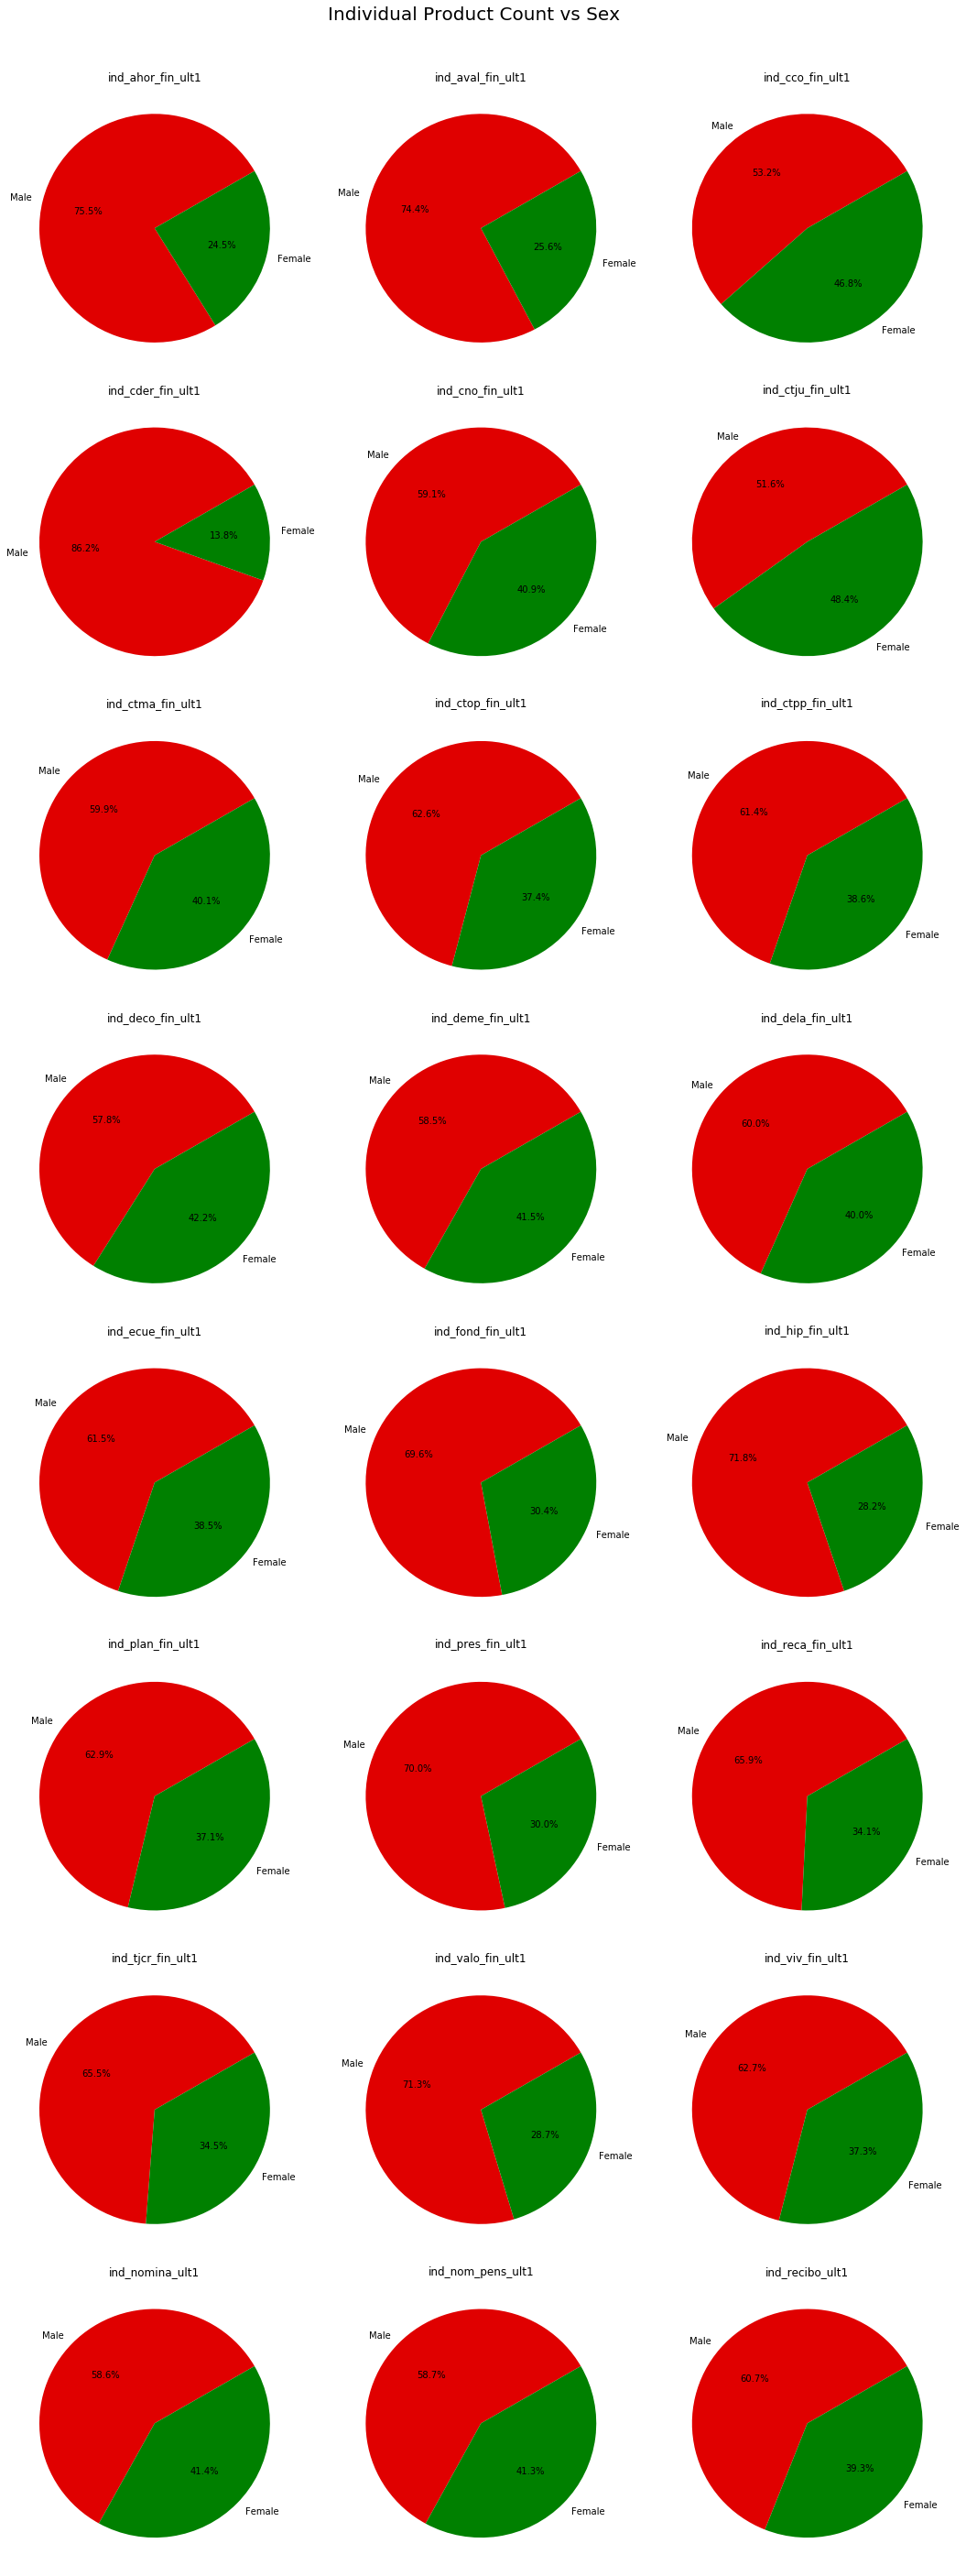

In [14]:
%matplotlib inline
fig, axs = plt.subplots(8, 3, figsize=(15, 40))
fig.suptitle("Individual Product Count vs Sex", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
axs = axs.ravel()

i = 0
for products in class_label_columns:
    temp = df.groupby('sexo')[products].apply(lambda x: x.astype(int).sum())
    axs[i].pie(temp, labels=['Male', 'Female'], colors=['#E00000', 'Green'], startangle=30, autopct='%1.1f%%')
    axs[i].set_title(products)
    i += 1

plt.savefig("Individual Product Count vs Sex.png")

The analysis of customer count and total count of products based on income is done. The overall distribution of customer count and product count based on income level is almost similar.

Further analysis is done for individual products ownership based on income level. If we closely observe the income group <b>0-75K</b>, it is noted that though the overall product share for the group is 21.5% but 33.9% of the <b>ind_pres_fin_ult1 (Loans)</b> distributed by the bank is consumed by this income group. The income-group <b>150k-300K</b> has higher percentage of <b>ind_tjcr_fin_ult1	(Credit Card)</b>, <b>ind_valo_fin_ult1 (Securities)</b>, <b>ind_plan_fin_ult1 (Pensions)</b> and <b>ind_fond_fin_ult1 (Funds)</b>.

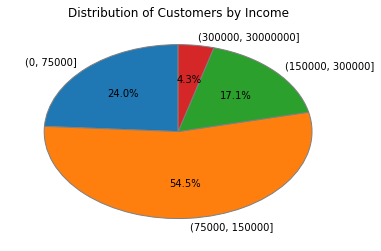

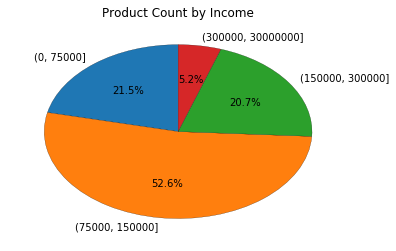

In [18]:
# Analysis based on income
df['income_group'] = pd.cut(df['renta'], bins=[0, 75000, 150000, 300000, 30000000])
temp_income_count = df[['ncodpers', 'income_group']].groupby('income_group').count()

plt.figure()
temp_income_count.plot(kind='pie', y='ncodpers', autopct='%1.1f%%',
                     wedgeprops={'ec': 'gray'},
                    startangle=90, fontsize=10, legend=False)
axes = plt.gca()
plt.ylabel(" ")
plt.title("Distribution of Customers by Income")
plt.savefig("Distribution of Customers by Income.png")
plt.show()
plt.close()

df.groupby('income_group')['total_products'].sum().plot(kind='pie', y='total_products', autopct='%1.1f%%',
                    wedgeprops={'ec': 'black','linewidth': 0.2},
                    startangle=90, fontsize=10, legend=False)
axes = plt.gca()
plt.ylabel(" ")
plt.title("Product Count by Income")
plt.savefig("Product Count by Income.png")
plt.show()
plt.close()

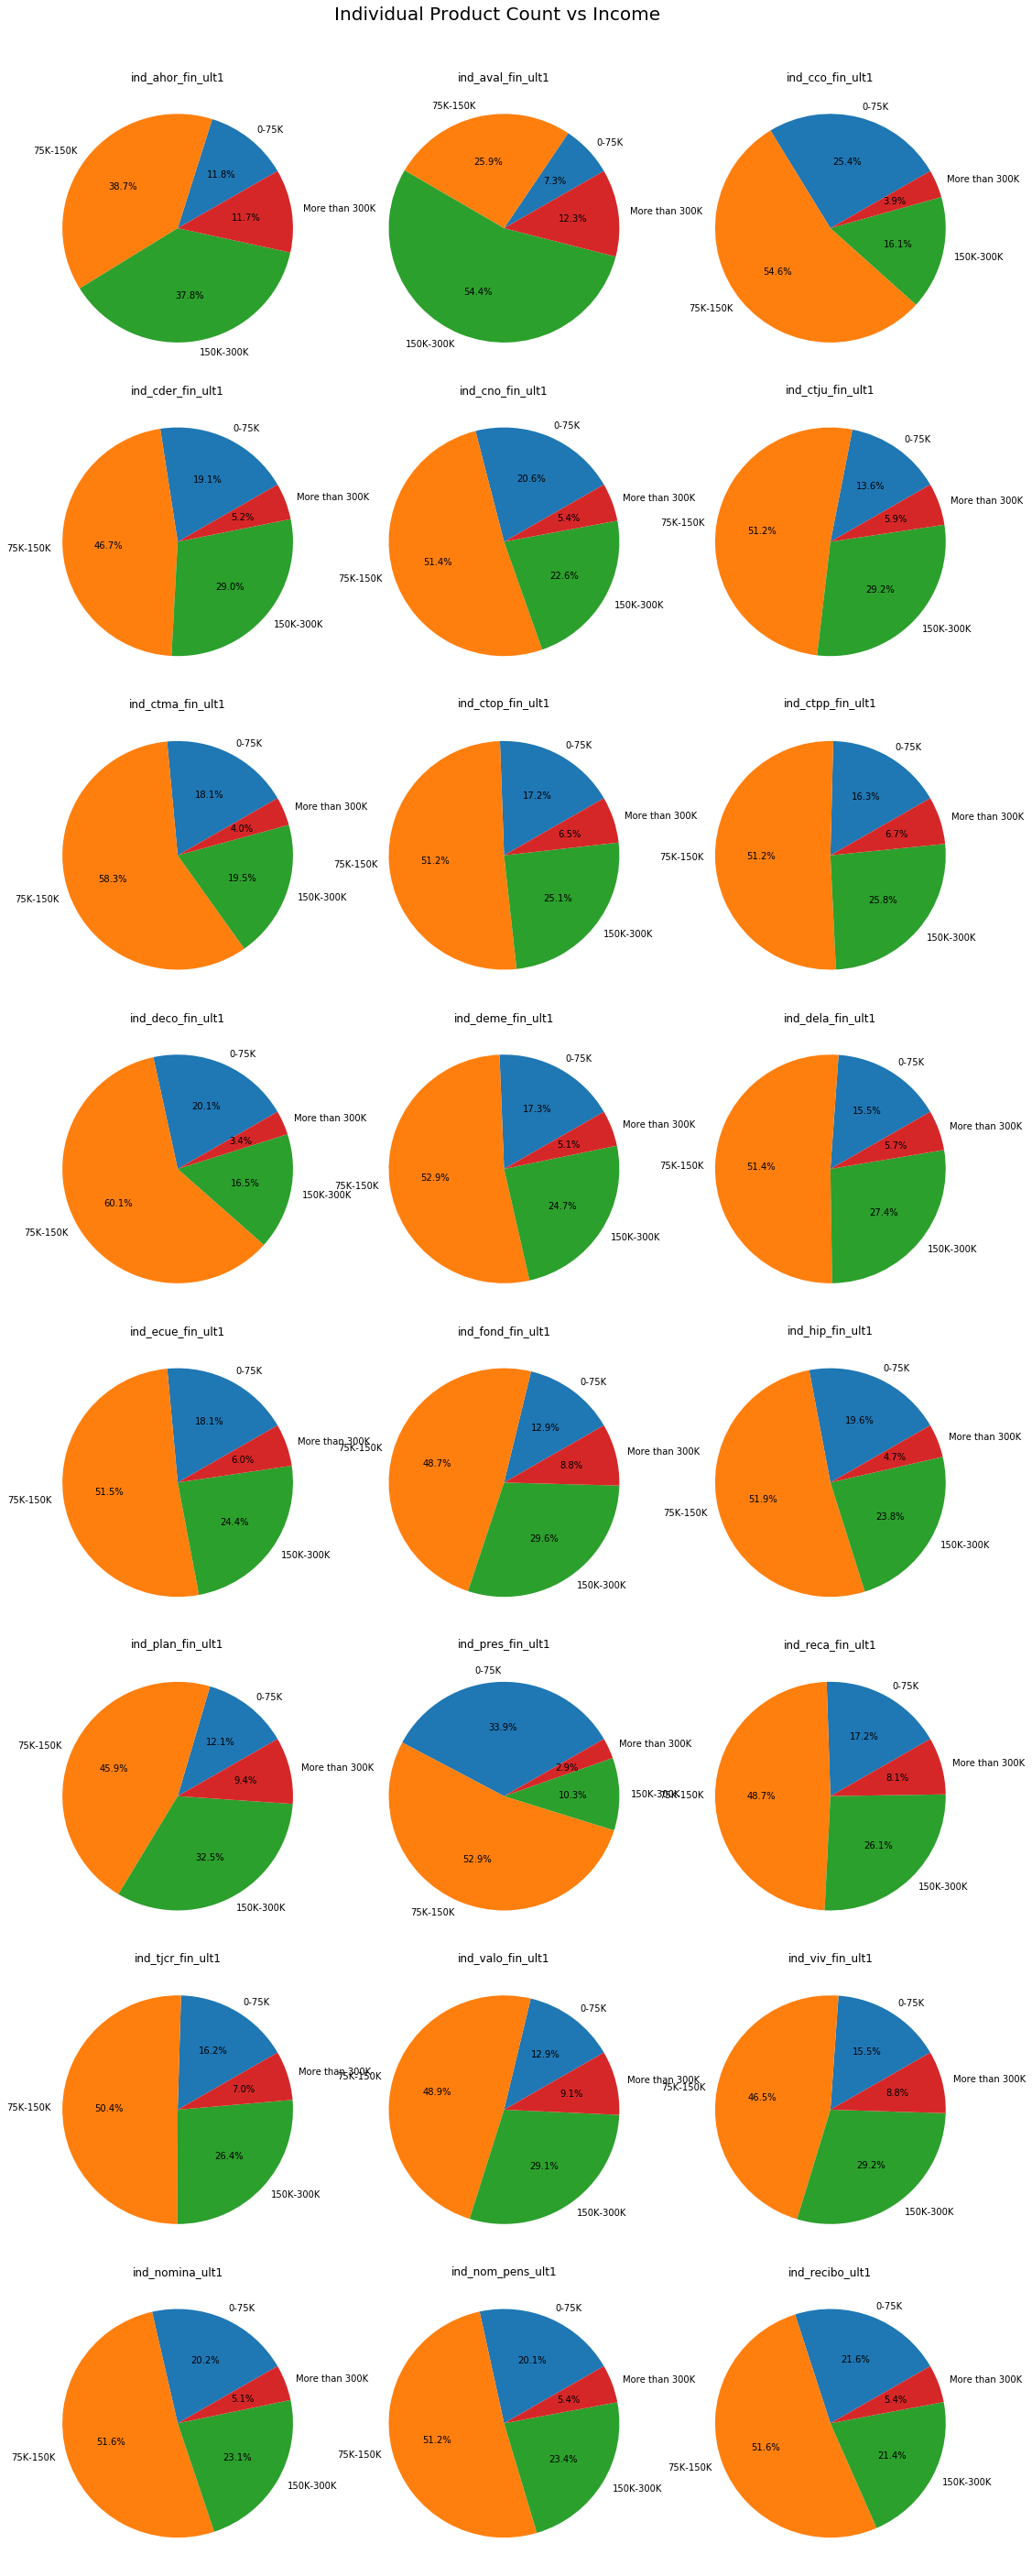

In [25]:
%matplotlib inline
fig, axs = plt.subplots(8, 3, figsize=(15, 40))
fig.suptitle("Individual Product Count vs Income", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
labels = ['0-75K', '75K-150K', '150K-300K', 'More than 300K']
axs = axs.ravel()

i = 0
for products in class_label_columns:
    temp = df.groupby('income_group')[products].apply(lambda x: x.astype(int).sum())
    axs[i].pie(temp, startangle=30, autopct='%1.1f%%', labels=labels)
    axs[i].set_title(products)
    i += 1

plt.savefig("Individual Product Count vs Income.png")